In [ ]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
import PIL

In [ ]:
!echo "Downloading kagglecatsanddogs for image notebooks"
!curl -L -o kagglecatsanddogs_5340.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
!unzip kagglecatsanddogs_5340.zip  # Extract the outer .zip
!rm kagglecatsanddogs_5340.zip
!ls PetImages


Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/5523.jpg  

In [ ]:
# prompt: limitar cada categoria a 300 imagens

import os
import random

def limit_images_per_category(directory, limit=300):
  """Limits the number of images in each subdirectory to the specified limit.

  Args:
    directory: The root directory containing subdirectories of images.
    limit: The maximum number of images to keep per category.
  """
  for subdir, _, files in os.walk(directory):
    if subdir != directory:  # Skip the root directory itself
      image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
      if len(image_files) > limit:
          images_to_keep = random.sample(image_files, limit)
          images_to_remove = set(image_files) - set(images_to_keep)

          for img in images_to_remove:
              os.remove(os.path.join(subdir, img))
          print(f"Limited images in {subdir} to {limit}")

# Example usage: Assuming your image data is in 'PetImages'
limit_images_per_category('PetImages', limit=300)

Limited images in PetImages/Cat to 300
Limited images in PetImages/Dog to 300


In [ ]:
root = 'PetImages'
exclude = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['PetImages/Cat', 'PetImages/Dog']


In [ ]:
# prompt: mostrar número de imagens por categoria

import os

# Assuming 'categories' list is defined as in the provided code.
image_counts = {}
for category in categories:
  image_count = 0
  for filename in os.listdir(category):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        image_count += 1
  image_counts[category] = image_count

for category, count in image_counts.items():
    print(f"Category: {category}, Image Count: {count}")

Category: PetImages/Cat, Image Count: 300
Category: PetImages/Dog, Image Count: 300


In [ ]:
# prompt: excluir todos os arquivos que não são .jpg

import os

def delete_non_jpg_files(directory):
  """Deletes all files in a directory that are not JPG images.

  Args:
    directory: The path to the directory.
  """
  for filename in os.listdir(directory):
    if not filename.lower().endswith(".jpg"):
      filepath = os.path.join(directory, filename)
      try:
        if os.path.isfile(filepath):
          os.remove(filepath)
          print(f"Deleted file: {filepath}")
      except OSError as e:
        print(f"Error deleting file {filepath}: {e}")

# Example usage (assuming your images are in the 'PetImages' directory):
for category in categories:
  delete_non_jpg_files(category)

Deleted file: PetImages/Cat/Thumbs.db
Deleted file: PetImages/Dog/Thumbs.db


This function is useful for pre-processing the data into an image and input vector.

In [ ]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Load all the images from root folder

In [ ]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f7259f450d0>

In [ ]:
# prompt: remova os arquivos PetImages/Cat/666.jpg e PetImages/Dog/11702.jpg

import os

# Define the paths to the files to be removed
file_paths = [
    'PetImages/Cat/666.jpg',
    'PetImages/Dog/11702.jpg'
]

# Iterate through the file paths and remove the files
for file_path in file_paths:
  if os.path.exists(file_path):
    os.remove(file_path)
    print(f"File '{file_path}' removed successfully.")
  else:
    print(f"File '{file_path}' not found.")

File 'PetImages/Cat/666.jpg' not found.
File 'PetImages/Dog/11702.jpg' not found.


In [ ]:
# helper function to load image and return it and input vector
def get_image(path):
    try:
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return img, x
    except PIL.UnidentifiedImageError:
        print(f"Skipping file {path}: Could not identify image file.")
        return None, None

data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        if img is not None and x is not None:  # Check if image was loaded successfully
            data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)
print(num_classes)

2


Randomize the data order.

In [ ]:
random.shuffle(data)

create training / validation / test split (70%, 15%, 15%)

In [ ]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

Separate data for labels.

In [ ]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]


Pre-process the data as before by making sure it's float32 and normalized between 0 and 1.

In [ ]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(90, 2)


Let's get a summary of what we have.

In [ ]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 600 images from 2 categories
train / validation / test split: 420, 90, 90
training data shape:  (420, 224, 224, 3)
training labels shape:  (420, 2)


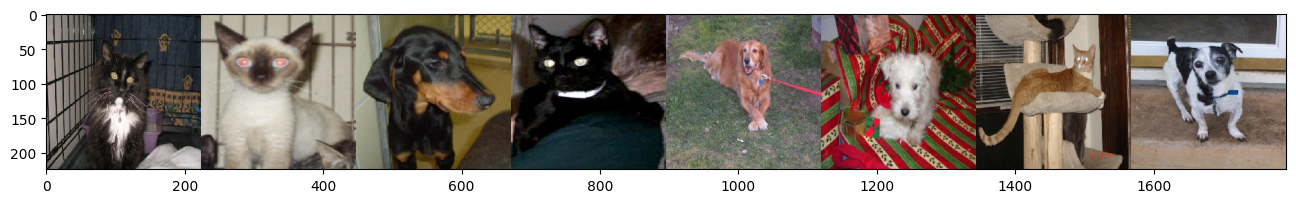

In [ ]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

In [ ]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_7 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))


Epoch 1/10
4/4 [==============================] - 25s 5s/step - loss: 0.6949 - accuracy: 0.5238 - val_loss: 0.6900 - val_accuracy: 0.5444
Epoch 2/10
4/4 [==============================] - 21s 5s/step - loss: 0.6884 - accuracy: 0.5381 - val_loss: 0.6858 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 21s 5s/step - loss: 0.6691 - accuracy: 0.5857 - val_loss: 0.6708 - val_accuracy: 0.6222
Epoch 4/10
4/4 [==============================] - 21s 5s/step - loss: 0.6324 - accuracy: 0.6429 - val_loss: 0.6625 - val_accuracy: 0.6111
Epoch 5/10
4/4 [==============================] - 21s 5s/step - loss: 0.6139 - accuracy: 0.6595 - val_loss: 0.7532 - val_accuracy: 0.5111
Epoch 6/10
4/4 [==============================] - 21s 5s/step - loss: 0.6131 - accuracy: 0.6595 - val_loss: 0.6690 - val_accuracy: 0.5778
Epoch 7/10
4/4 [==============================] - 21s 5s/step - loss: 0.5945 - accuracy: 0.6667 - val_loss: 0.6782 - val_accuracy: 0.5333
Epoch 8/10
4/4 [==================

Let's plot the validation loss and validation accuracy over time.

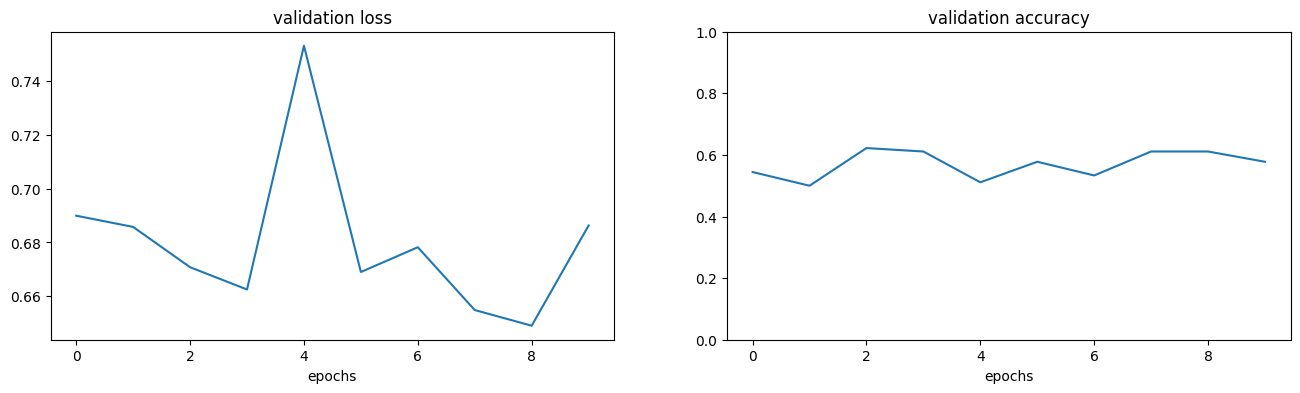

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.709641695022583
Test accuracy: 0.5888888835906982


## Transfer learning by starting with existing network

Now we can move on to the main strategy for training an image classifier on our small dataset: by starting with a larger and already trained network.

To start, we will load the VGG16 from keras, which was trained on ImageNet and the weights saved online. If this is your first time loading VGG16, you'll need to wait a bit for the weights to download from the web. Once the network is loaded, we can again inspect the layers with the `summary()` method.

In [ ]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))


Epoch 1/10
4/4 [==============================] - 109s 26s/step - loss: 0.8509 - accuracy: 0.5548 - val_loss: 0.7706 - val_accuracy: 0.4889
Epoch 2/10
4/4 [==============================] - 105s 26s/step - loss: 0.6791 - accuracy: 0.5976 - val_loss: 0.5773 - val_accuracy: 0.7000
Epoch 3/10
4/4 [==============================] - 105s 26s/step - loss: 0.5875 - accuracy: 0.6786 - val_loss: 0.5663 - val_accuracy: 0.6556
Epoch 4/10
4/4 [==============================] - 105s 26s/step - loss: 0.5107 - accuracy: 0.7762 - val_loss: 0.5058 - val_accuracy: 0.7889
Epoch 5/10
4/4 [==============================] - 105s 26s/step - loss: 0.4557 - accuracy: 0.8167 - val_loss: 0.5411 - val_accuracy: 0.6889
Epoch 6/10
4/4 [==============================] - 105s 26s/step - loss: 0.4437 - accuracy: 0.8024 - val_loss: 0.4673 - val_accuracy: 0.8333
Epoch 7/10
4/4 [==============================] - 105s 26s/step - loss: 0.4104 - accuracy: 0.8571 - val_loss: 0.4615 - val_accuracy: 0.7444
Epoch 8/10
4/4 [====

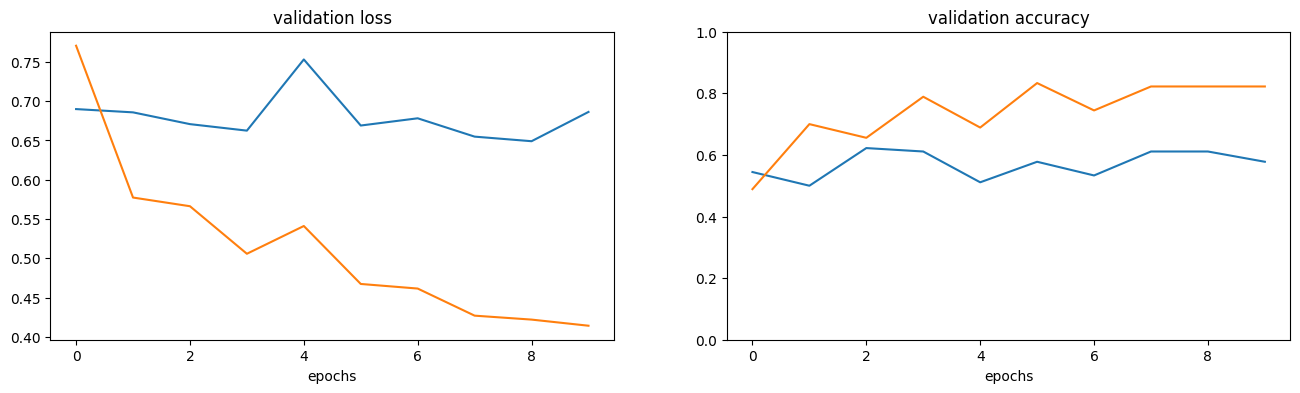

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.39986833930015564
Test accuracy: 0.8444444537162781


To predict a new image, simply run the following code to get the probabilities for each class.

In [ ]:
img, x = get_image('Images/dog.11.jpg')
probabilities = model_new.predict([x])
class_index = np.argmax(probabilities)
confidence = probabilities[0][class_index] * 100
print(confidence)
classes = ['Gato', 'Cachorro']

# Exibir o resultado
print(f"A imagem foi classificada como '{classes[class_index]}' "
      f"com {confidence:.2f}% de confiança.")

1/1 [==============================] - 1s 679ms/step
100.0
A imagem foi classificada como 'Cachorro' com 100.00% de confiança.
